<a href="https://colab.research.google.com/github/Ayaj-Ahmed/CAPSTONE-EDA/blob/main/Airbnb_Bookings_EDA_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

## <b> Data Exploration on Airbnb (NYC)</b>
<b>Airbnb, Inc. is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities.</b>

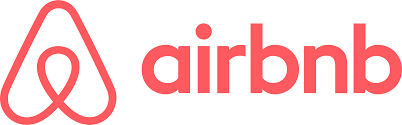

In [ ]:
# Importing necessary libraries for analysis of the dataset.
#This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [ ]:
#importing dataset from Local Drive(PC)
from google.colab import files
uploaded = files.upload()

Saving airbnbnyc2019.csv to airbnbnyc2019.csv


In [ ]:
#Python io module allows us to manage the file-related input and output operations. 
import io
# using pandas library and 'read_csv' function to read Airbnb NYC 2019 csv file
airbnb = pd.read_csv(io.BytesIO(uploaded['airbnbnyc2019.csv']))
#examing head of Airbnb NYC 2019 csv file
airbnb.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [ ]:
# checking the number of rows in the given dataset to understand the size of the data
print("Rows     :",airbnb.shape[0])
print("Columns  :",airbnb.shape[1])
print("\nFeatures :\n",airbnb.columns.tolist())
print("\nMissing Value    :\n",airbnb.isnull().sum())
print("\nTotal Number of Missing Value in the Dataset    :",airbnb.isnull().sum().sum())
print("\nColumns with missing value:\n",airbnb.isnull().any())

Rows     : 48895
Columns  : 16

Features :
 ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

Missing Value    :
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Total Number of Missing Va

#<b>We have 4 column that contains a missing value</b>
name, host_name, last_review & reviews_per_month.

1) Name:- We dont need this column as we can do with host "ID" instead for the sake of simplicity as recreating the missing values is limitation on part 

2) host_name:- No rationale could be formed to continue data exploration towards specific individuals based on their names. For ethical reason keeping data privacy norms in minds we are dropping this column

3) last_reviews:- This column is irrelevant as no concencrete observation can be deduced from this column hence we are dropping this column

4) reviews_per_month- It had been assumed that there is no reviews for the listing leading to the blank cells hence a value of "0" (zero) can be assigned to those missing values/blank cells for a simplified approach.

In [ ]:
#replacing all NaN values in 'reviews_per_month' with 0
airbnb.fillna({'reviews_per_month':0}, inplace=True)
#Checking out the results
airbnb.reviews_per_month.isnull().sum()

0

In [ ]:
#dropping columns that are not important for data analysis or could be unethical to use for data exploration and predictions
airbnb.drop(['name','host_name','last_review'], axis=1, inplace=True)
#Checking out the results
airbnb.head(3)

In [ ]:
#checking type of every column in the dataset
airbnb.dtypes

id                                  int64
host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

##<b> Let's Explore the Dataset </b>

##<b>What can we learn about different hosts and areas?</b>


In [ ]:
#Starting by Capturing the unique data of neighbourhood_groups
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
#Starting by Capturing the unique data of neighbourhood
airbnb.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

##<b>New York is made up of five major areas or “boroughs,” some separated by rivers and connected via ferry or bridge. So, what are the five boroughs of New York ? </b>
##<b>1) Manhattan, 2) Brooklyn, 3) Queens, 4) Staten Island, and 5) The Bronx.</b>

(A Borough is a town or district which is an administrative unit)

In [ ]:
#Lets find the top 10 host_ID with the most listing, taking maximum utility out of Airbnb service
top_10_host=airbnb.host_id.value_counts().head(10)
print(top_10_host)

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64


In [ ]:
#Lets find out the host with the maximum listing on Airbnb site for NYC
top_host_check=airbnb.calculated_host_listings_count.max()
top_host_check 

327

##<b> Host ID 219517861 have 327 listing !!!... The highest across New York City</b>

In [ ]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')
top_10_host_df=pd.DataFrame(top_10_host)
top_10_host_df.reset_index(inplace=True)
top_10_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_10_host_df

,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

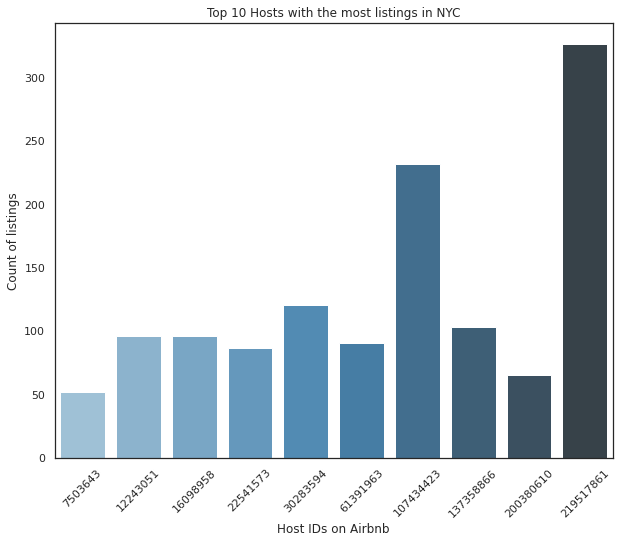

In [ ]:
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_10_host_df,
                 palette='Blues_d')
viz_1.set_title('Top 10 Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs on Airbnb')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

In [ ]:
#Lets find the unique values of neighbourhood
len(airbnb.neighbourhood.unique())

221

In [ ]:
#as earlier reflected the values for neighbourhood are way too many to concentrate on;
#therefore, let's see the top 20 neighbourhoods that have the most listings in them

#Searching out the top 20 neighbourhoods
airbnb.neighbourhood.value_counts().head(20)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
East Harlem           1117
Greenpoint            1115
Chelsea               1113
Lower East Side        911
Astoria                900
Washington Heights     899
West Village           768
Financial District     744
Flatbush               621
Clinton Hill           572
Name: neighbourhood, dtype: int64

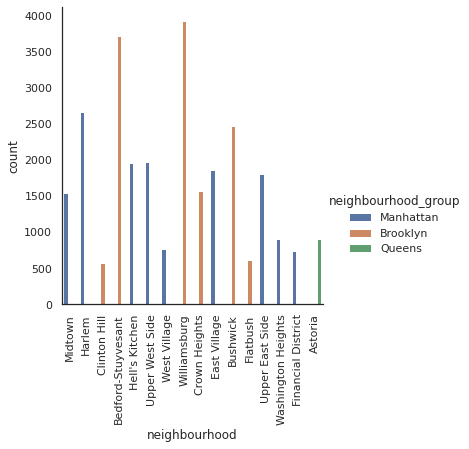

In [ ]:
#let's now combine this data with our boroughs for a rich visualization and some meaninful insight

#grabbing top 20 neighbourhoods for sub-dataframe
sub_7=airbnb.loc[airbnb['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown','East Harlem''Greenpoint',
                 'Chelsea''Lower East Side','Astoria','Washington Heights','West Village','Financial District','Flatbush','Clinton Hill'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

##<b> The maximum crowding of hostings are in the neighbourhood of the boroughs of Manhatten, Brooklyn & Queens  
An analysis of a sample of top 20 neighbourhood with repect to their boroughs reflect the insight</b>

In [ ]:
# Total Listing across neighbourhood
sum(airbnb.neighbourhood.value_counts())

48895

In [ ]:
# Total Listing across Top 20 neighbourhood
sum(airbnb.neighbourhood.value_counts().head(20))

32206